# Challenge Activities

#### 1. What steps would you take to solve this problem? Please describe as completely and clearly as possible all the steps that you see as essential for solving the problem.

Para resolver este problema é fundamental seguir o método CRISP nas seguintes etapas:
1. Compreender o Problema de Negócio
2. Importar/coletar os dados
3. Limpar os Dados
4. Realizar Análise Exploratória dos Dados
5. Preparação dos Dados
6. Selecionar as variáveis mais relevantes
7. Treinar algoritmos de Machine Learning
8. Avaliar a performance desses algoritmos
9. Ajustar os hiperparâmetros
10. Gerar a Matriz de Confusão
11. Avaliar o impacto e a solução final

#### 2. Which technical data science metric would you use to solve this challenge? Ex: absolute error, rmse, etc. 

Por se tratar de um projeto de classificação, as métricas usadas serão Precisão, Recall, F1-Score e área sob a curva ROC. O modelo será ajustado nos hiperparâmetros a fim de maximizar a área sob a curva ROC.

#### 3. Which business metric would you use to solve the challenge?

A métrica de negócio que será utilizada aqui será a Redução de Custos. Tendo ciência dos custos dos últimos anos com o sistema de ar condicionado, o objetivo aqui é reduzir este custo anual. 

#### 4. How do technical metrics relate to the business metrics?

As métricas técnicas se relacionam com as métricas de negócio de forma que o ajuste dos valores das métricas técnicas vão impactar no custo, no caso a métrica de negócio. Em suma, a métrica técnica representa a qualidade do modelo e, quanto mais qualidade e performance deste modelo, melhor será para a métrica de negócio, ou seja, diminuir o custo.

#### 5. What types of analyzes would you like to perform on the customer database?

Podem ser realizadas as análises descritivas, fazendo médias, medianas, desvios padrão. Representação por gráficos, histogramas, boxplots e histplots. Além disso, podemos fazer análises bivariadas, como correlações entre as features e heatmaps. E também análises preditivas, utilizando algoritmos de machine learning.

#### 6. What techniques would you use to reduce the dimensionality of the problem? 

Pode ser usada a técnica do PCA, recomendada para datasets com centenas ou até milhares de variáveis. Para reduzir a dimensionalidade do problema podemos utilizar métodos para filtrar as melhores features, ou seja, as variáveis capazes de descrever melhor o problema de negócio. Além disso, usaremos também modelos baseados em Árvore, como Random forest, LGBM e XGboost. Esses modelos são interessantes para isso pois em dados com alta dimensionalidade, há algumas características não tão importantes para a predição que podem atrapalhar o modelo. Assi, Os algoritmos baseados em árvore ajudam a eliminar essas características irrelevantes, reduzindo o número total de características.

#### 7. What techniques would you use to select variables for your predictive model?

Podem ser usadas a correlação, feature importance, utilização do método Boruta.

#### 8. What predictive models would you use or test for this problem? Please indicate at least 3.

Pra esse problema nós podemos usar a Random Forest, Extra Tree, o LGBM e o XGBoost.

#### 9. How would you rate which of the trained models is the best?

A avaliação é feita a partir das métricas apresentadas acima. Neste caso, a área sob a curva ROC é uma boa métrica pra mostrar o quão bem performou o algoritmo. Além disso, tendo ciência do risco de overfitting, usamos também o cross-validation para cada um dos modelos. 

#### 10. How would you explain the result of your model? Is it possible to know which variables are most important?

Para explicar o resultado deste modelo, depende de quem são nossos interlocutores. Por exemplo, para uma equipe técnica é interessante falar sobre as métricas mais técnicas como Precisão x Recall, curva ROC etc. Já para explicar para clientes ou outras pessoas de outros times na empresa, a abordagem deve ser mais voltada para o negócio, falando mais sobre os custos, sobre como cada resultado em cada cenário vai impactar de forma diferente nos custos. Em relação Às variáveis, podemos utilizar árvores de decisão, feature importance, correlações para saber quais variáveis tem mais relação com o a variável alvo estudada. 

#### 11. How would you assess the financial impact of the proposed model?

O impacto financeito é avaliado comparando-se o custo dos anos anteriores com o custo atual que o modelo está propondo. Em suma, um baseline para comparação, além de poder calcular a porcentagem de queda em relação aos custos anteriores. 

#### 12. What techniques would you use to perform the hyperparameter optimization of the chosen model?

A técnica utilizada será o Optuna. O optuna faz um estudo pegando por intervalo escolhido de cada parâmetro também escolhido. Também é possível escolher o número de interações que ele vai percorrer. 

#### 13. What risks or precautions would you present to the customer before putting this model into production?

A principal recomendação para o cliente é em relação a performance da produção. Pode ser que o desempenho mostrado aqui tenha alterações na produção. Portanto, o modelo deve ser monitorado continuamente. Este fato, claro, impacta diretamente nos resultados de negócio, que também devem ser avaliados continuamente. Além disso, o modelo também deve ser preparado para ter segurança necessária em relação a proteção de dados e perigos em relação a manipulação de dados. 

#### 14. If your predictive model is approved, how would you put it into production?

Inicialmente o modelo deve ser salvo utilizando Pickle. Em seguida, pode ser necessária a construção de uma API que permita que o modelo seja acessado por outros usuários e outras aplicações, atuando como um "intermediário" entre as predições e o usuário que vai acessá-las. Em seguida criar conteineres que inclua a API e utilizar serviços pra gerenciá-los.

#### 15. If the model is in production, how would you monitor it?

O modelo pode ser monitorado por ferramentas como Prometheus e Grafana, que monitoram a performance do modelo e da API. É importante também configurar alertas em caso de problemas de performance ou ainda outros eventuais erros que possam acontecer.

#### 16. If the model is in production, how would you know when to retrain it?

O modelo deve ser retreinado quando ele passa a não desempenhar bem, em relação a como vinha desempenhando. Portanto, as métricas devem continuar sendo avaliadas e monitoradas, bem como a matriz de confusão, que quando apresentar um número mais elevado que o esperado de falsos negativos e falsos positivos deve-se avaliar a possibilidade do retreino. O retreino também acontece com entrada de novos dados, novas features, depois de recortes e intervalos de tempo significativos ou ainda outros fatores capazes de alterar o desempenho do modelo. 


# 0.0 Imports

In [2]:
import numpy  as np
import pandas as pd
import seaborn as sns
import math

from matplotlib import pyplot as plt
from sklearn  import linear_model    as lm
from sklearn  import model_selection as ms
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss

## 0.1 Loading Dataset

In [4]:
df0 = pd.read_csv('datasets/air_system_previous_years.csv')
df_test = pd.read_csv('datasets/air_system_present_year.csv')

In [5]:
df0.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


# 1.0 Data Description

In [7]:
df1 = df0.copy()

## 1.1 Data Dimension

In [8]:
print ('Number of Rows: {}'.format(df1.shape[0]))
print ('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 60000
Number of Columns: 171


In [6]:
df0['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

## 1.2 Data Types

In [10]:
print(df1.dtypes.to_string())

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
av_000    object
ax_000    object
ay_000    object
ay_001    object
ay_002    object
ay_003    object
ay_004    object
ay_005    object
ay_006    object
ay_007    object
ay_008    object
ay_009    object
az_000    object
az_001    object
az_002    object
az_003    object
az_004    object
az_005    object
az_006    object
az_007    object
az_008    object
az_009    object
ba_000    object
ba_001    object
ba_002    object
ba_003    object
ba_004    object
ba_005    obje

## 1.3 Check NA

In [240]:
print(df1.isna().sum().sum())

0


In [12]:
na_counts = (df1 == 'na').sum().to_string()
print("Contagem de valores 'na' por coluna:\n", na_counts)

Contagem de valores 'na' por coluna:
 class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
az_007      671
az_008      671
az_009      671
ba_000      688
ba_001      688
ba_002      688
ba_003      688
ba_004      688
ba_005      688
ba_006      688
ba

## 1.4 Checking if it is feasible to delete "Na"

In [13]:
df1_total_row = len(df1)

df_sem_na = df1.replace('na', np.nan)

df_sem_na = df_sem_na.dropna()

linhas_excluidas = len(df1) - len(df_sem_na)

print(f'Total de linhas excluídas se deletar todas as linhas que estão "na" são {linhas_excluidas}.')

Total de linhas excluídas se deletar todas as linhas que estão "na" são 59409.


## 1.5 Fillout NA

In [14]:
df1.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [15]:
class_column = df1['class']

df1_num = df1.drop(columns=['class']).replace('na', np.nan)

df1_num = df1_num.apply(pd.to_numeric)

df1_num.fillna(df1_num.mean(), inplace=True)

df2 = pd.concat([class_column, df1_num], axis=1)

In [16]:
df2.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


## 1.5 Data Descriptive

### 1.5.1 Cálculos do Questionário

In [196]:
class_column = df1['class']

df0_num = df0.drop(columns=['class']).replace('na', np.nan)

df0_num = df0_num.apply(pd.to_numeric)

#print(df_num_sem_na['ag_002'].mean())
#print(df_num_sem_na['ag_002'].median())
#print(df_num_sem_na['ag_002'].std())

65606.18274111675
0.0
362102.96872435254


In [ ]:
spearman_corr = df_num_sem_na.corr(method='spearman')

print("Correlação de Spearman:")
print(spearman_corr.to_string())
#clear output

In [ ]:
spearman_corr = df_num_sem_na.corr(method='pearson')

print("Correlação de Spearman:")
print(spearman_corr.to_string())
#clear output

In [217]:
df0.replace('na', np.nan, inplace=True)

df_non_null = df0.dropna()

median_values = df_non_null.groupby('class')['ad_000'].median()

print(median_values)

class
neg    512.0
pos    732.0
Name: ad_000, dtype: object


In [218]:
df0.replace('na', np.nan, inplace=True)

df_non_null = df0.dropna()

median_values = df_non_null.groupby('class')['ee_001'].mean()

print(median_values)

class
neg    inf
pos    inf
Name: ee_001, dtype: object


In [220]:
na_count = df0.isna().sum().sum()
na_count

850015

In [223]:
na_counts = df0.isna().sum()

na_counts_sorted = na_counts.sort_values(ascending=False)

top_5_columns_with_most_na = na_counts_sorted.head(5)

print("Top 5 colunas com mais 'na':")
print(top_5_columns_with_most_na)

Top 5 colunas com mais 'na':
br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
dtype: int64


In [238]:
df0.replace('na', np.nan, inplace=True)

df0['ci_000'] = pd.to_numeric(df0['ci_000'], errors='coerce')

df_non_null = df0.dropna()

quantile_value = df_non_null['ci_000'].quantile(0.32)

quantile_value

8838965.76

In [17]:
num_attributes = df2.select_dtypes(include=['int64','float64'])
cat_attributes = df2.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [202]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T

#concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,aa_000,0.0,2.746564e+06,2.746564e+06,5.933650e+04,30776.000000,1.454288e+05,6.115752,48.297441
1,ab_000,0.0,2.040000e+02,2.040000e+02,7.131885e-01,0.713189,1.660574e+00,58.832490,5378.301894
2,ac_000,0.0,2.130707e+09,2.130707e+09,3.560143e+08,188.000000,7.724614e+08,1.836615,1.432058
3,ad_000,0.0,8.584298e+09,8.584298e+09,1.906206e+05,288.000000,3.504486e+07,244.946956,59999.340667
4,ae_000,0.0,2.105000e+04,2.105000e+04,6.819130e+00,0.000000,1.581407e+02,92.536509,11229.408625
...,...,...,...,...,...,...,...,...,...
165,ee_007,0.0,1.195801e+08,1.195801e+08,3.462714e+05,43587.000000,1.718352e+06,15.805875,537.340779
166,ee_008,0.0,1.926740e+07,1.926740e+07,1.387300e+05,4474.000000,4.469857e+05,13.501972,299.207426
167,ee_009,0.0,3.810078e+06,3.810078e+06,8.388915e+03,0.000000,4.720385e+04,29.378866,1541.007172
168,ef_000,0.0,4.820000e+02,4.820000e+02,9.057895e-02,0.000000,4.268493e+00,75.158262,6403.297172


# 2.0 Feature Engineering

# 3.0 Data Filtering

In [19]:
df3 = df2.copy()

In [20]:
df3['class'] = df3['class'].map({'neg': 0, 'pos': 1})

# 4.0 Exploratory Data Analysis

In [21]:
df4 = df3.copy()

## 4.1 Univariate Analysis

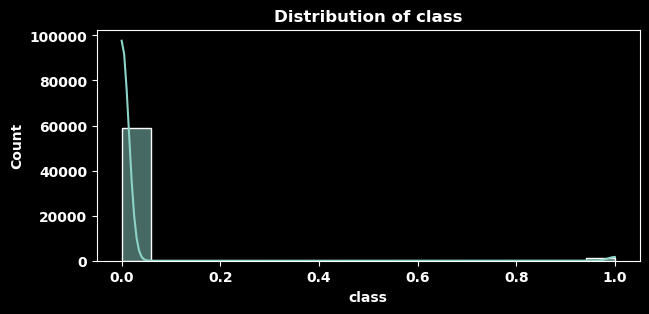

In [501]:
plt.figure(figsize=(7, 3))
sns.histplot(df4['class'], kde=True)
plt.title(f'Distribution of class')
plt.show()

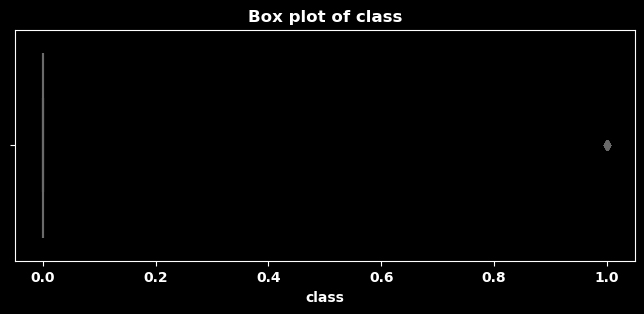

In [499]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df4['class'])
plt.title(f'Box plot of class')
plt.show()

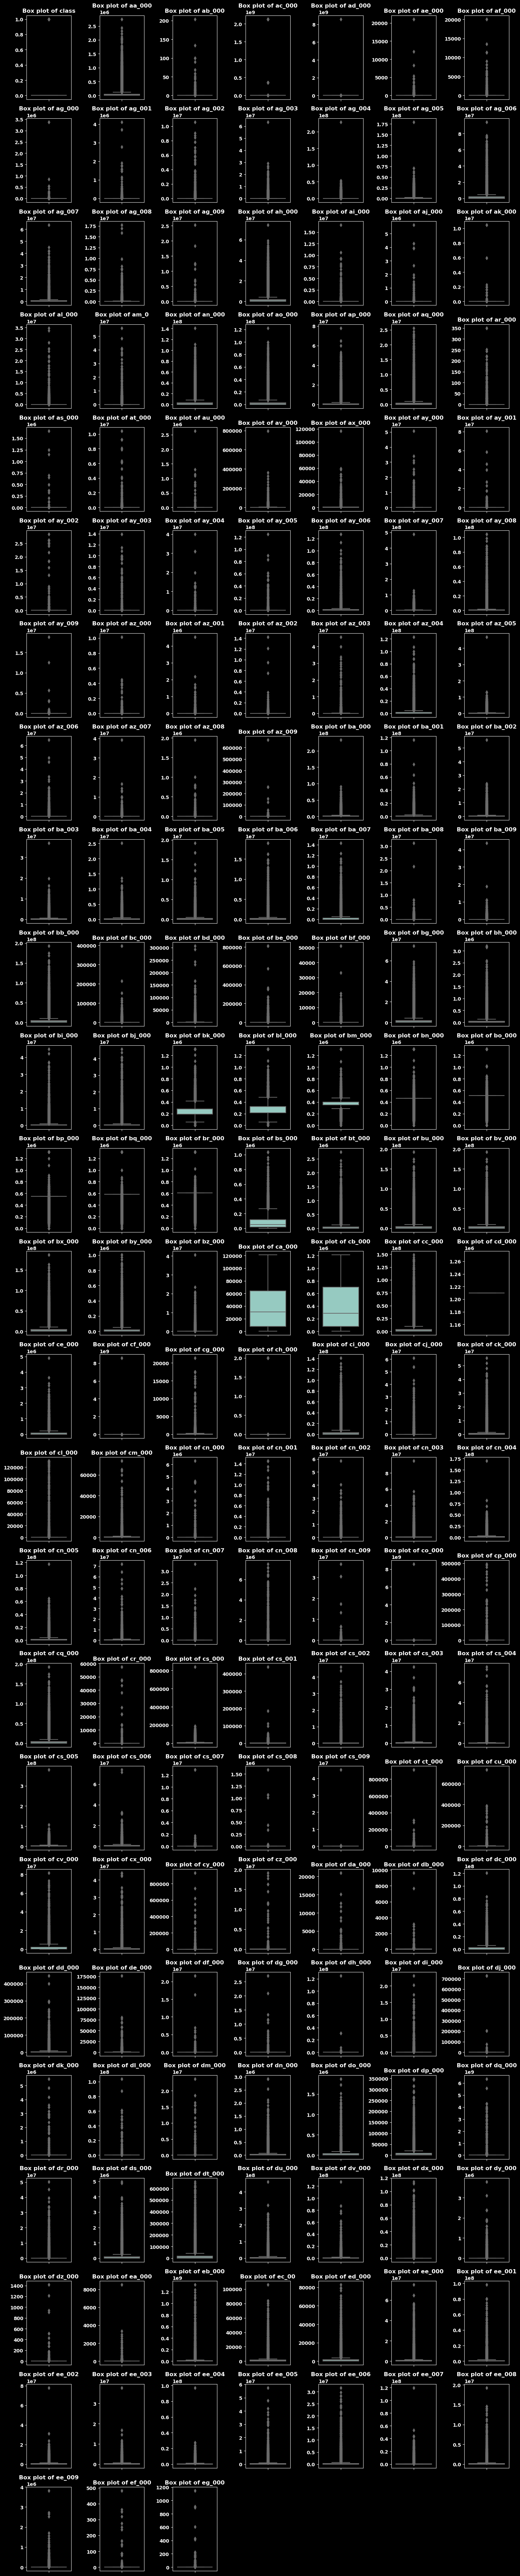

In [493]:
n_cols = 7
n_rows = math.ceil(len(df4.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows)) 

for idx, col in enumerate(df4.columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    sns.boxplot(y=df4[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Box plot of {col}')
    axes[row, col_idx].set_xlabel('')
    axes[row, col_idx].set_ylabel('')

for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


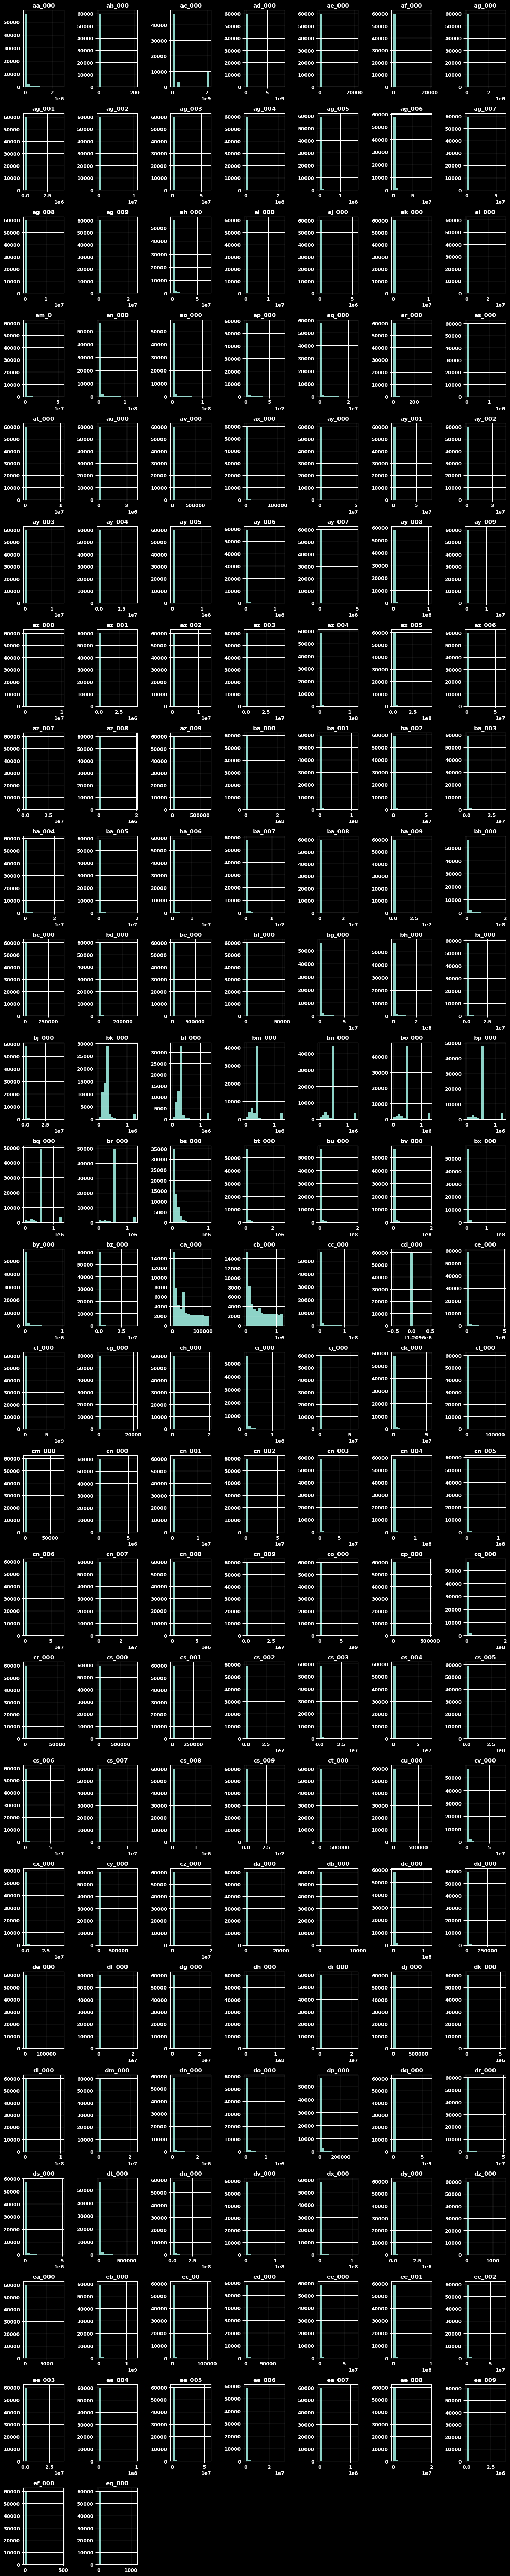

In [497]:
n_cols = 7
n_rows = math.ceil(len(num_attributes.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows)) # Adjust figsize as needed

for idx, col in enumerate(num_attributes.columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    num_attributes[col].hist(bins=15, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Hide any empty subplots
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## 4.2 Bivariate Analysis

c:\Users\rseme\anaconda3\envs\propensao\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


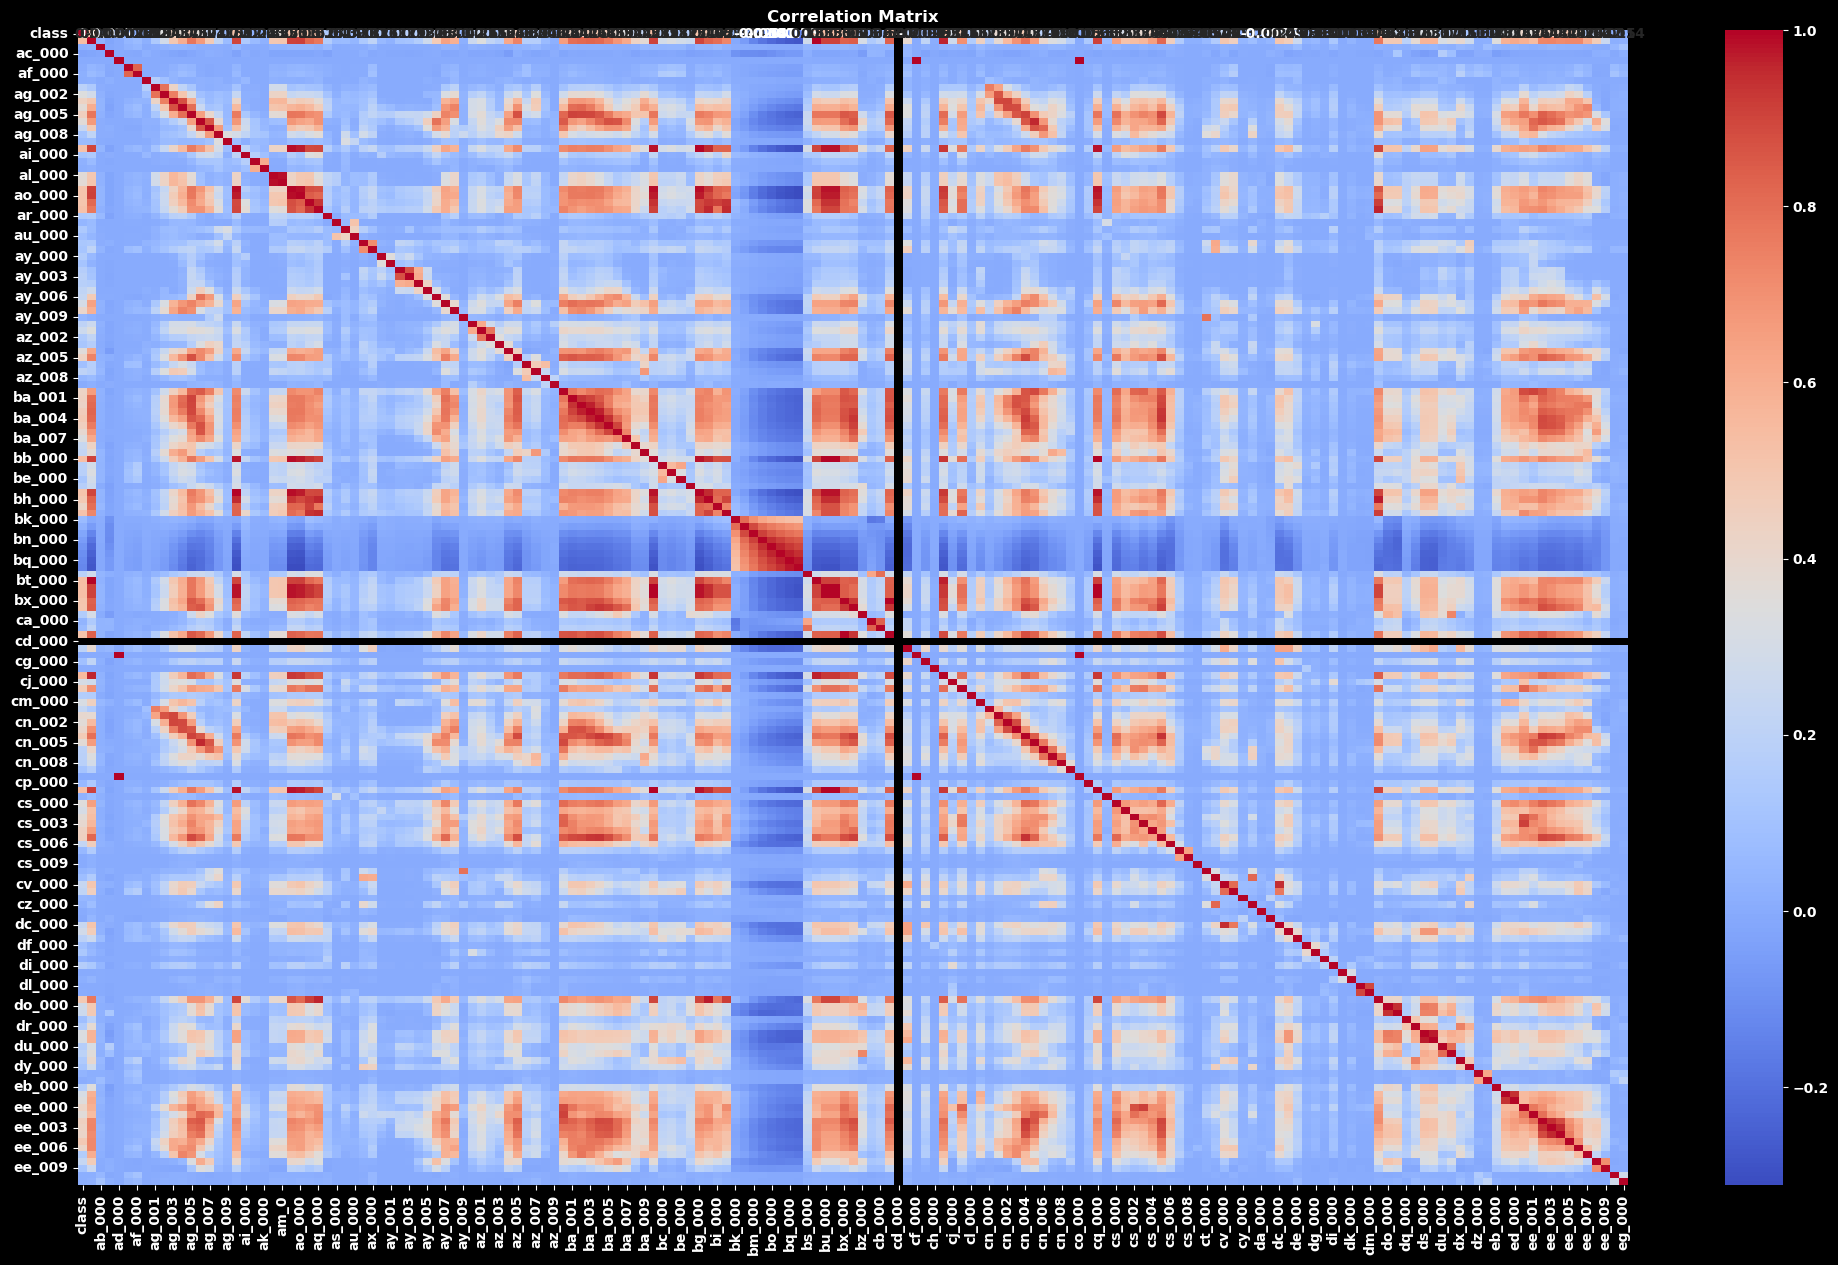

In [486]:
corr_matrix = df4.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5.0 Data Preparation

In [22]:
df5 = df4.copy()

## 5.1 Split train and validation

In [23]:
x = df5.drop('class', axis=1)
y = df5['class'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( x, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

## 5.2 Rescaling

In [25]:
mms = MinMaxScaler()

x_train_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)

x_train = x_train_scaled

## 5.3 Validation Preparation

In [28]:
x_validation_scaled = pd.DataFrame(mms.transform(x_validation), columns=x_validation.columns)

x_validation = x_validation_scaled


# 6.0 Feature Selection

In [91]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=150, random_state=0, n_jobs=-1 )

forest.fit( x_train, y_train )

ExtraTreesClassifier(n_estimators=150, n_jobs=-1, random_state=0)

Feature ranking:
  feature  importance
0  bv_000    0.022633
0  bu_000    0.022089
0  aq_000    0.021543
0  an_000    0.018085
0  cq_000    0.017745
0  ee_005    0.017705
0  ag_002    0.017674
0  ag_003    0.017434
0  bj_000    0.017246
0    am_0    0.016740
0  ah_000    0.016602
0  bg_000    0.015403
0  cc_000    0.015280
0  bt_000    0.014565
0  ao_000    0.014522
0  cn_001    0.014512
0  al_000    0.013577
0  aa_000    0.013037
0  bx_000    0.012173
0  ci_000    0.011904
0  ap_000    0.010702
0  by_000    0.010654
0  bh_000    0.010421
0  dn_000    0.010021
0  ba_005    0.009986
0  cn_000    0.009765
0  ee_000    0.009459
0  ag_001    0.009272
0  ck_000    0.009166
0  ee_007    0.008969
0  cj_000    0.008674
0  ag_004    0.008669
0  cs_002    0.008621
0  cn_004    0.007876
0  ay_008    0.007689
0  cs_005    0.007645
0  ag_006    0.007519
0  ba_000    0.007483
0  cn_003    0.007307
0  bk_000    0.007276
0  cn_002    0.007227
0  bb_000    0.007123
0  az_007    0.007089
0  ba_003    0.

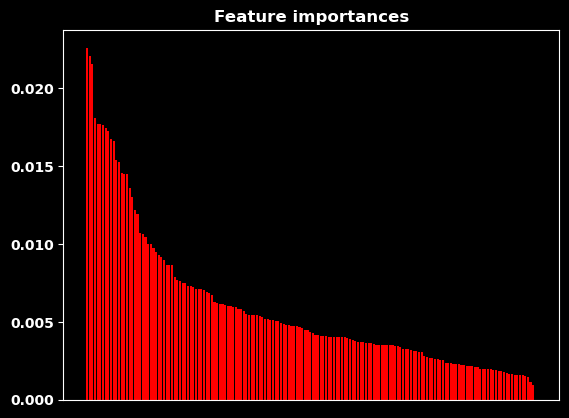

In [93]:
importances = forest.feature_importances_

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train, importances):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 ).sort_values( 'importance', ascending=False )
    
print( df.to_string() )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(x= df['feature'], height=df['importance'],data=df,color="r")
plt.xticks([])
plt.show()

In [241]:
cols_selected = [
"bv_000", "bu_000", "aq_000", "an_000", "cq_000", "ee_005", "ag_002", "ag_003",
"bj_000", "am_0", "ah_000", "bg_000", "cc_000", "bt_000", "ao_000", "cn_001",
"al_000", "aa_000", "bx_000", "ci_000", "ap_000", "by_000", "bh_000", "dn_000",
"ba_005", "cn_000", "ee_000", "ag_001", "ck_000", "ee_007", "cj_000", "ag_004",
"cs_002", "cn_004", "ay_008", "cs_005", "ag_006", "ba_000", "cn_003", "bk_000",
"cn_002", "bb_000", "az_007", "ba_003", "bi_000", "ee_004", "ba_004", "ay_009",
"ay_005", "ba_001", "ba_006", "cn_005", "ay_006", "cs_004", "ec_00", "az_004",
"ay_003", "ee_003", "az_001", "ba_002", "do_000", "ee_002", "ba_007", "bs_000",
"ai_000", "cl_000", "ee_006", "ed_000", "dg_000", "cs_003", "az_002", "cs_000",
"ag_005", "dp_000", "ee_008", "ag_007", "bl_000", "ay_000", "ay_007", "bp_000",
"ay_004", "bq_000", "ee_001", "cn_006", "ay_002", "aj_000", "bm_000", "ba_008",
"cs_001", "br_000", "at_000", "df_000", "de_000", "dt_000", "cm_000", "az_000",
"az_005", "bn_000", "cn_007", "dd_000", "az_003", "ba_009", "bo_000", "cn_008",
"cs_006", "cv_000", "ds_000", "di_000", "ce_000", "cb_000", "dr_000", "cs_007",

]
    
x_train_n = x_train[cols_selected]
x_validation_n = x_validation[cols_selected]  

# 7.0 Machine Learning Moddeling

## 7.1 Random Forest Regressor

In [243]:
# model definition
rf = en.RandomForestClassifier( n_estimators=90,max_depth=8, n_jobs=-1, random_state=42 ) 

# model training
rf.fit( x_train, y_train )

# model prediction
yhat_rf = rf.predict_proba( x_validation )

In [244]:
# Cálculo das métricas
precision_class1 = precision_score(y_validation, yhat_rf.argmax(axis=1), pos_label=1)
recall_class1 = recall_score(y_validation, yhat_rf.argmax(axis=1), pos_label=1)
f1_class1 = f1_score(y_validation, yhat_rf.argmax(axis=1), pos_label=1)
auc_class1 = roc_auc_score(y_validation, yhat_rf[:, 1])
log_loss_value = log_loss(y_validation, yhat_rf)

# Impressão das métricas
print(f"Precisão (Classe 1): {precision_class1:.2f}")
print(f"Recall (Classe 1): {recall_class1:.2f}")
print(f"F1-score (Classe 1): {f1_class1:.2f}")
print(f"AUC (Classe 1): {auc_class1:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

Precisão (Classe 1): 0.92
Recall (Classe 1): 0.64
F1-score (Classe 1): 0.76
AUC (Classe 1): 0.99
Log Loss: 0.02


### 7.1.1 RF Cross Validation

In [246]:
scores = cross_val_score(rf, x_train_n, y_train, cv=5, scoring='recall')
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation scores: [0.60759494 0.62658228 0.59493671 0.60126582 0.58860759]
Mean cross-validation accuracy: 0.6037974683544304


## 7.2 Light Gradient Boosting Machine Classifier model

In [263]:
# model definition
lgbm_model = LGBMClassifier(
                           max_depth=11,
                           learning_rate= 0.08, 
                           n_estimators= 100, 
                           subsample= 0.7, 
                           colsample_bytree= 0.6
                           
                        )

# model training
lgbm_model.fit( x_train, y_train )

# model prediction
yhat_lgbm = lgbm_model.predict_proba( x_validation)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 790, number of negative: 47210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39033
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 169
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016458 -> initscore=-4.090328
[LightGBM] [Info] Start training from score -4.090328
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [264]:
# Cálculo das métricas
precision_class1 = precision_score(y_validation, yhat_lgbm.argmax(axis=1), pos_label=1)
recall_class1 = recall_score(y_validation, yhat_lgbm.argmax(axis=1), pos_label=1)
f1_class1 = f1_score(y_validation, yhat_lgbm.argmax(axis=1), pos_label=1)
auc_class1 = roc_auc_score(y_validation, yhat_lgbm[:, 1])
log_loss_value = log_loss(y_validation, yhat_lgbm)

# Impressão das métricas
print(f"Precisão (Classe 1): {precision_class1:.3f}")
print(f"Recall (Classe 1): {recall_class1:.3f}")
print(f"F1-score (Classe 1): {f1_class1:.3f}")
print(f"AUC (Classe 1): {auc_class1:.3f}")
print(f"Log Loss: {log_loss_value:.3f}")

Precisão (Classe 1): 0.923
Recall (Classe 1): 0.738
F1-score (Classe 1): 0.820
AUC (Classe 1): 0.992
Log Loss: 0.017


### 7.2.1 LGBM Cross Validation

In [ ]:
scores = cross_val_score(lgbm_model, x_train, y_train, cv=5, scoring='recall')
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

## 7.3 Extra Tree Classifier

In [255]:
# model definition
et = en.ExtraTreesClassifier( n_estimators=100,max_depth=11, n_jobs=-1, random_state=42 ) 

# model training
et.fit( x_train, y_train )

# model prediction
yhat_et = et.predict_proba( x_validation )

In [256]:
# Cálculo das métricas
precision_class1 = precision_score(y_validation, yhat_et.argmax(axis=1), pos_label=1)
recall_class1 = recall_score(y_validation, yhat_et.argmax(axis=1), pos_label=1)
f1_class1 = f1_score(y_validation, yhat_et.argmax(axis=1), pos_label=1)
auc_class1 = roc_auc_score(y_validation, yhat_et[:, 1])
log_loss_value = log_loss(y_validation, yhat_et)

# Impressão das métricas
print(f"Precisão (Classe 1): {precision_class1:.2f}")
print(f"Recall (Classe 1): {recall_class1:.2f}")
print(f"F1-score (Classe 1): {f1_class1:.2f}")
print(f"AUC (Classe 1): {auc_class1:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

Precisão (Classe 1): 0.94
Recall (Classe 1): 0.57
F1-score (Classe 1): 0.71
AUC (Classe 1): 0.98
Log Loss: 0.03


### 7.3.1 ET Cross Validation

In [257]:
scores = cross_val_score(et, x_train, y_train, cv=5, scoring='recall')
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation scores: [0.50632911 0.53797468 0.48734177 0.5443038  0.5443038 ]
Mean cross-validation accuracy: 0.5240506329113923


## 7.4 XGBoost

In [266]:
xgb_classifier = XGBClassifier(subsample=0.8, 
                               n_estimators=120,
                               eta=0.9,
                               min_child_weight=5,
                               max_depth=7, 
                               colsample_bytree=0.2)

xgb_classifier.fit(x_train, y_train)

yhat_xgb = xgb_classifier.predict_proba(x_validation)

In [267]:
# Cálculo das métricas
precision_class1 = precision_score(y_validation, yhat_xgb.argmax(axis=1), pos_label=1)
recall_class1 = recall_score(y_validation, yhat_xgb.argmax(axis=1), pos_label=1)
f1_class1 = f1_score(y_validation, yhat_xgb.argmax(axis=1), pos_label=1)
auc_class1 = roc_auc_score(y_validation, yhat_xgb[:, 1])
log_loss_value = log_loss(y_validation, yhat_xgb)

# Impressão das métricas
print(f"Precisão (Classe 1): {precision_class1:.3f}")
print(f"Recall (Classe 1): {recall_class1:.3f}")
print(f"F1-score (Classe 1): {f1_class1:.3f}")
print(f"AUC (Classe 1): {auc_class1:.3f}")
print(f"Log Loss: {log_loss_value:.3f}")

Precisão (Classe 1): 0.891
Recall (Classe 1): 0.781
F1-score (Classe 1): 0.832
AUC (Classe 1): 0.986
Log Loss: 0.024


### 7.4.1 XGBoost Cross Validation

In [268]:
scores = cross_val_score(xgb_classifier, x_train, y_train, cv=5, scoring='recall')
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation scores: [0.70886076 0.71518987 0.73417722 0.74683544 0.70253165]
Mean cross-validation accuracy: 0.7215189873417721


# 8.0 Final Model 

## 8.1 Train

In [293]:
x = df4.drop( 'class', axis=1 )
y = df4['class'].copy() 

In [294]:
mms = MinMaxScaler()

x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

## 8.2 Test

In [395]:
df_test['class'].value_counts()

class
neg    15625
pos      375
Name: count, dtype: int64

In [320]:
x_test = df_test.copy()
x_test['class'] = x_test['class'].map({'neg': 0, 'pos': 1})

In [322]:
y_test = x_test['class']

In [324]:
y_test.value_counts()

class
0    15625
1      375
Name: count, dtype: int64

In [325]:
x_test = df_test.drop( 'class', axis=1 )

In [326]:
x_test = x_test.replace('na', np.nan)
x_test = x_test.apply(pd.to_numeric)
x_test = x_test.fillna(x_test.mean())


In [327]:
x_test = pd.DataFrame(mms.transform(x_test), columns=x_test.columns)

# 9.0 Fine Tuning with Optuna

In [384]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        'subsample': trial.suggest_float('subsample', 0.01, 0.99),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'eta': trial.suggest_float('eta', 0.001, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 12),
        'max_depth': trial.suggest_int('max_depth', 3, 11),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
        'random_state': 42
    }
    
    model = XGBClassifier(**params)
    model.fit(x, y)
    y_pred = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)
    
    return roc_auc

# Configuração do estudo Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Melhores parâmetros encontrados
print("Melhores parâmetros:", study.best_params)
print("Melhor ROC AUC encontrado:", study.best_value)

[I 2024-07-11 12:01:01,494] A new study created in memory with name: no-name-3d1aca24-5dc7-4830-a022-b835e72913a5
[I 2024-07-11 12:01:09,293] Trial 0 finished with value: 0.98126592 and parameters: {'subsample': 0.4015281176651615, 'n_estimators': 59, 'eta': 0.8832864978988112, 'min_child_weight': 9, 'max_depth': 5, 'colsample_bytree': 0.7447300940639803}. Best is trial 0 with value: 0.98126592.
[I 2024-07-11 12:02:06,083] Trial 1 finished with value: 0.9942586026666665 and parameters: {'subsample': 0.7940896395981414, 'n_estimators': 242, 'eta': 0.47695344506456544, 'min_child_weight': 2, 'max_depth': 4, 'colsample_bytree': 0.9574222760560753}. Best is trial 1 with value: 0.9942586026666665.
[I 2024-07-11 12:02:26,441] Trial 2 finished with value: 0.9944374613333333 and parameters: {'subsample': 0.5873572425545128, 'n_estimators': 105, 'eta': 0.04078219881202427, 'min_child_weight': 7, 'max_depth': 3, 'colsample_bytree': 0.9182016906304478}. Best is trial 2 with value: 0.9944374613333

Melhores parâmetros: {'subsample': 0.388820765999555, 'n_estimators': 226, 'eta': 0.07036202197513876, 'min_child_weight': 8, 'max_depth': 8, 'colsample_bytree': 0.8587727056650034}
Melhor ROC AUC encontrado: 0.997095424


In [400]:
xgb_final = XGBClassifier(subsample=0.388820765999555, 
                               n_estimators=226,
                               eta=0.07036202197513876,
                               min_child_weight=8,
                               max_depth=8, 
                               colsample_bytree=0.8587727056650034)

xgb_final.fit(x, y)

yhat_xgb_final = xgb_final.predict_proba(x_test)

# 10.0 Impacto de Negócio e Ajuste com Trashold

In [463]:
thresholds = np.linspace(0, 1, 100)
best_threshold = None
min_cost = float('inf')

for threshold in thresholds:
    y_pred_binary = (yhat_xgb_final[:, 1] > threshold).astype(int)
    
    # Calcular FN, TP, FP
    fn = confusion_matrix(y_test, y_pred_binary)[1, 0]
    tp = confusion_matrix(y_test, y_pred_binary)[1, 1]
    fp = confusion_matrix(y_test, y_pred_binary)[0, 1]
    
    # Calcular custo total
    total_cost = fn * 500 + tp * 25 + fp * 10
    
    # Atualizar o melhor threshold se encontrar um custo menor
    if total_cost < min_cost:
        min_cost = total_cost
        best_threshold = threshold

print("Melhor Threshold:", best_threshold)


Melhor Threshold: 0.020202020202020204


In [466]:
threshold = 0.020202020202020204
y_pred_binary_xgb = (yhat_xgb_final[:, 1] > threshold).astype(int)

# Calcular precisão e recall
precision = precision_score(y_test, y_pred_binary_xgb)
recall = recall_score(y_test, y_pred_binary_xgb)
roc_auc = roc_auc_score(y_test, yhat_xgb_final[:, 1])

print("Precisão:", precision)
print("Recall:", recall)
print('ROC AUC:', roc_auc)

Precisão: 0.48663101604278075
Recall: 0.9706666666666667
ROC AUC: 0.9961535146666666


In [468]:
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred_binary_xgb)

print("Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
[[15241   384]
 [   11   364]]


In [467]:
fn = confusion_matrix(y_test, y_pred_binary_xgb)[1, 0]
tp = confusion_matrix(y_test, y_pred_binary_xgb)[1, 1]
fp = confusion_matrix(y_test, y_pred_binary_xgb)[0, 1]

total_cost = fn * 500 + tp * 25 + fp * 10
    
total_cost

18440

Após a escolha do trashold de aproximadamente de 2%, foi possível construir a Matriz de Confusão, que pode ser analisada da seguinte maneira:

#### True Negatives (TN): 15241
Estes são os casos em que o modelo previu a classe negativa corretamente. Ou seja, o modelo previu que 15241 caminhões não tem defeitos no sistema de ar e realmente não tem.

#### False Negatives (FN): 11
Estes são os casos em que o modelo previu a classe negativa incorretamente. Ou seja, o modelo previu que 11 caminhões não apresentavam defeitos no sistema de ar, mas que estavam sim defeituosos. 

#### False Positives (FP): 384
Estes são os casos em que o modelo previu a classe positiva incorretamente. Ou seja, o modelo previu que 384 caminhões apresentavam defeitos, mas que na verdade não estavam defeituosos.


#### True Positives (TP): 364
Estes são os casos em que o modelo previu a classe positiva corretamente. Ou seja, o modelo previu que 364 caminhões apresentavam defeitos no sistema de ar e realmente estavam defeituosos. 

## Custos por cenário

- Segundo enunciado, caso um caminhão seja enviado para manutenção, mas não apresente nenhum defeito nesse sistema, serão cobrados cerca de 10 dólares pelo tempo gasto na inspeção pela equipe especializada. Portanto, como o modelo vai apresentar 384 caminhões como defeituosos (mas que não estão), estes caminhões serão enviados para manutenção e assim será cobrado 10 dólares de cada um. Logo: 10*384 = $ 3840

- Caso um caminhão seja enviado para manutenção e apresente defeito neste sistema, serão cobrados 25 dólares para realizar o serviço de reparo preventivo. Portanto, como o modelo vai apresentar 364 caminhões como defeituosos(e estão realmente), será cobrado 25 dólares pra cada caminhão pro reparo preventivo. Logo: 25*364 = $ 9100

- Caso um caminhão com defeito no sistema de ar não seja enviado diretamente para manutenção, a empresa paga 500 dólares para realizar a manutenção corretiva do mesmo, considerando mão de obra, reposição de peças e outros possíveis inconvenientes. Portanto, como o modelo vai apresentar 11 caminhões sem defeitos no sistema de ar (mas que estão com defeito), estes caminhões não serão enviados para manuntenção e a empresa terá que gastar 500 dólares para realizar uma manutenção corretiva. Logo: 500*11 = $ 5500.

## Custo Total

Assim, o custo total pro ano de 2022 é de: 3840 + 9100 + 5500 = 18.440 dólares

Este valor é menor que o valor de todos os anos registrados desde 2016. Além disso, é 50% mais baixo do que o valor do último ano apresentado (2020).